#  🏡 Melbourne Ev Fiyatları Tahmini 



![](http://www.melbourne.crowneplaza.com/wp-content/uploads/2021/09/footer_meetings-events.webp)

Avustralya’nın en büyük ikinci şehri olan Melbourne, dinamik konut piyasası ve hızla değişen demografik yapısıyla veri bilimi açısından zengin bir analiz alanı sunmaktadır.
Bu notebook'ta, Melbourne'deki konut satış verilerini kullanarak fiyat tahmini, özellik mühendisliği, ve modelleme üzerine kapsamlı bir çalışma gerçekleştireceğiz.

# 🛠️ Gerekli Kütüphanelerin Yüklenmesi

Analizimize başlamadan önce, veri yükleme, temizleme, görselleştirme ve modelleme işlemleri için ihtiyaç duyacağımız Python kütüphanelerini import ediyoruz.

Aşağıdaki kütüphaneler şunlar için kullanılacaktır:

- **pandas**: Veri manipülasyonu ve analiz işlemleri  
- **numpy**: Sayısal hesaplamalar  
- **matplotlib & seaborn**: Görselleştirme  
- **scikit-learn**: Makine öğrenmesi modelleri ve değerlendirme metrikleri  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', None)

## 1. Veri Setini Tanıyalım  
## 2. Eksik Verilere Göz Atalım
## 3. Veri Görselleştirme
## 4. Aykırı Değer Analizi 
## 5. Özellik Mühendisliği 
## 6. Modelleme  
## 7. Hiperparametre Optimizasyonu
## 8. Sonuç  

## 1. Veri Setini Tanıyalım

Bu bölümde, Melbourne konut veri setini içe aktararak ilk bakışı atacağız.  
Veri setinin genel yapısını, kaç satır ve sütundan oluştuğunu,veri türlerini ve eksik değer içerip içermediğini inceleyeceğiz.

Ardından her bir sütunun ne anlama geldiğini açıklayarak veri setine daha iyi hâkim olacağız.

In [ ]:
df=pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")

# İlk 5 satıra göz atalım
df.head()

İlk birkaç gözleme baktıktan sonra, şimdi veri setinde yer alan tüm değişkenleri inceleyelim.

Hangi sütun ne anlama geliyor, hepsini açıklayarak ilerleyelim.

In [3]:
df.columns.tolist()

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

| **Sütun Adı**        | **Açıklama** |
|:------------------:|----------|
| **Suburb**        | Evin bulunduğu semt veya mahalle adı. |
| **Address**       | Evin açık adres bilgisi. |
| **Rooms**         | Toplam oda sayısını belirtir (yatak odası, oturma odası vb.). |
| **Type**          | Evin türünü belirtir (h = müstakil ev, u = apartman dairesi, t = yan yana sıralı ev). |
| **Price**         | Evin satış fiyatı (hedef değişken). |
| **Method**        | Satış yöntemi (S = doğrudan satış, PI = satış gerçekleşmedi, VB = açık artırma vb.). |
| **SellerG**       | Evi satan emlak ofisinin veya kişinin adı. |
| **Date**          | Satışın gerçekleştiği tarih. |
| **Distance**      | Şehir merkezine olan uzaklık (kilometre cinsinden). |
| **Postcode**      | Evin bulunduğu yerin posta kodu. |
| **Bedroom2**      | Yatak odası sayısı (bazı durumlarda Rooms ile aynı olabilir). |
| **Bathroom**      | Banyo sayısı. |
| **Car**           | Otopark kapasitesi (araç sayısı). |
| **Landsize**      | Arsanın büyüklüğü (metrekare cinsinden). |
| **BuildingArea**  | Binanın iç kullanım alanı (metrekare cinsinden). |
| **YearBuilt**     | Evin inşa edildiği yıl. |
| **CouncilArea**   | Evin bağlı bulunduğu yerel belediye birimi. |
| **Lattitude**     | Evin enlem bilgisi (coğrafi konum). |
| **Longtitude**    | Evin boylam bilgisi (coğrafi konum). |
| **Regionname**    | Evin bulunduğu geniş bölgesel sınıflandırma (örneğin Southern Metropolitan). |
| **Propertycount** | İlgili bölgede listelenmiş toplam satılık mülk sayısı. |



## 2. Eksik Verilere Göz Atalım




Veri setindeki eksik değerler, analiz sonuçlarının doğruluğunu doğrudan etkileyebilir.  
Bu adımda her bir sütunda kaç adet eksik değer olduğunu ve bunların veri setindeki oranlarını inceleyeceğiz.  
Bu sayede hangi sütunlara müdahale edilmesi gerektiğini belirleyebileceğiz.

In [4]:
# Eksik değer sayısı ve oranlarını hesaplayalım
missing_counts = df.isnull().sum()
missing_ratios = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Eksik Değer Sayısı': missing_counts,
    'Eksik Değer Oranı (%)': missing_ratios
})

# Sadece eksik değeri olanları alalım ve oranına göre sıralayalım
missing_df = missing_df[missing_df['Eksik Değer Sayısı'] > 0] \
    .sort_values(by='Eksik Değer Oranı (%)', ascending=False)
missing_df

,Eksik Değer Sayısı,Eksik Değer Oranı (%)
BuildingArea,6450,47.496318
YearBuilt,5375,39.580265
CouncilArea,1369,10.081001
Car,62,0.456554


##  Eksik Verilerle Uygun Şekilde Baş Etme
### BuildingArea

`BuildingArea` sütunu, veri setinde %47 oranında eksik değere sahiptir.  
Bu oran, neredeyse veri setinin yarısını temsil ettiğinden dolayı oldukça yüksektir.

Eğer bu kadar büyük oranda eksik veriyi ortalama, medyan veya mod gibi istatistiksel yöntemlerle doldurursak, bu sütunu neredeyse **biz oluşturmuş** oluruz.  
Bu da modelin öğrenmesini yanıltabilir ve sahte korelasyonlar oluşturabilir.

Bu nedenle `BuildingArea` sütunu, model performansını olumsuz etkilememesi adına veri setinden çıkartmalıyız.

### YearBuilt

`YearBuilt` sütunu, evin inşa edildiği yılı temsil eder ve yaklaşık %40 oranında eksik veri içermektedir.  
Bu değişkeni modelde kullanmak için doldurma yapılabilir, ancak tarih bilgisi yapısı gereği özneldir ve eksik olan kayıtlar için tahmin yapmak oldukça zordur.  

Ayrıca `YearBuilt` sütununun eksik olduğu örneklerde, diğer tarihsel sütunlar (örneğin `Date`) ile tutarlı şekilde doldurulması mümkün değildir.  
**Tarihler arasında çelişki yaratma riski** taşıdığından, bu değişkenin veri setinden çıkarılması daha güvenilir bir tercih olmuştur.

### CouncilArea

`CouncilArea` sütunu, evin bağlı olduğu belediye birimini ifade eder ve yaklaşık %10 oranında eksik veri içermektedir.  
Eksik değer oranı, bazı durumlarda doldurulabilir seviyede olsa da, bu değişkenin içerdiği kategori sayısı oldukça fazladır.  

Bu kadar fazla kategoriyi doldurmak , modelin karmaşıklığını artırabilir ve **aşırı öğrenme (overfitting)** riskine yol açabilir.   
Bu nedenle `CouncilArea` sütunu da veri setinden çıkarılmıştır.

### Car

`Car` sütunu, evin kaç araçlık otoparka sahip olduğunu gösterir. Sayısal değerlerden oluşsa da, bu değişken aslında sınırlı ve ayrık değerler içeren **sayısal kategorik** bir yapıya sahiptir.

Eksik oranı düşük (%0.45) olsa da, ortalama gibi kesirli bir değerle doldurmak, anlam açısından tutarsız olur. Örneğin 1.7 araç gibi bir değer gerçek dünyada karşılığı olmayan bir sonuçtur.

Bu nedenle, eksik değerleri **mod (en sık görülen değer)** ile doldurmak, hem istatistiksel olarak dengeli hem de anlamsal olarak daha uygundur.




In [5]:
columns_to_drop = [col for col in ['BuildingArea', 'YearBuilt', 'CouncilArea'] if col in df.columns]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df['Car'].fillna(df['Car'].mode()[0], inplace=True)


Veri setimizde eksik değerlere yönelik gerekli işlemleri gerçekleştirdik. Şimdi son bir kontrol yaparak herhangi bir eksik veri kalıp kalmadığını gözlemleyelim

In [6]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## 3. Veri Görselleştirme

 Bu bölümde, modelleme öncesi veriyi daha yakından tanımak ve içgörü elde etmek amacıyla temel görselleştirme adımları uygulanmaktadır.  

Veri görselleştirme sayesinde:

- Hedef değişkenin (`Price`) dağılımı analiz edilir  
- Özellikler ile hedef arasındaki ilişkiler görsel olarak incelenir  
- Zaman, konum ve kategori gibi faktörlerin fiyat üzerindeki etkisi anlaşılır  

### Hedef Değişkenin Dağılımı:`Price`

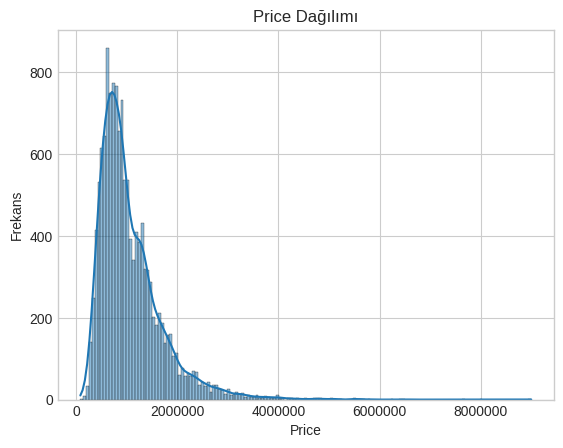

In [7]:
sns.histplot(df['Price'], kde=True)
plt.title("Price Dağılımı")
plt.xlabel("Price")
plt.ylabel("Frekans")

plt.ticklabel_format(useOffset=False, style='plain', axis='x')  
plt.show()

`Price` değişkeni sağa çarpık bir dağılım göstermektedir. Veri setindeki çoğu ev fiyatı 1.000.000  civarında yoğunlaşırken, 4 milyon  üzerindeki nadir ancak yüksek değerli evler dağılımı bozmaktadır. Bu durum, modelin öğrenme sürecini etkileyebileceğinden, log dönüşümü veya aykırı değer analizi gibi yöntemler ilerleyen adımlarda değerlendirilebilir.

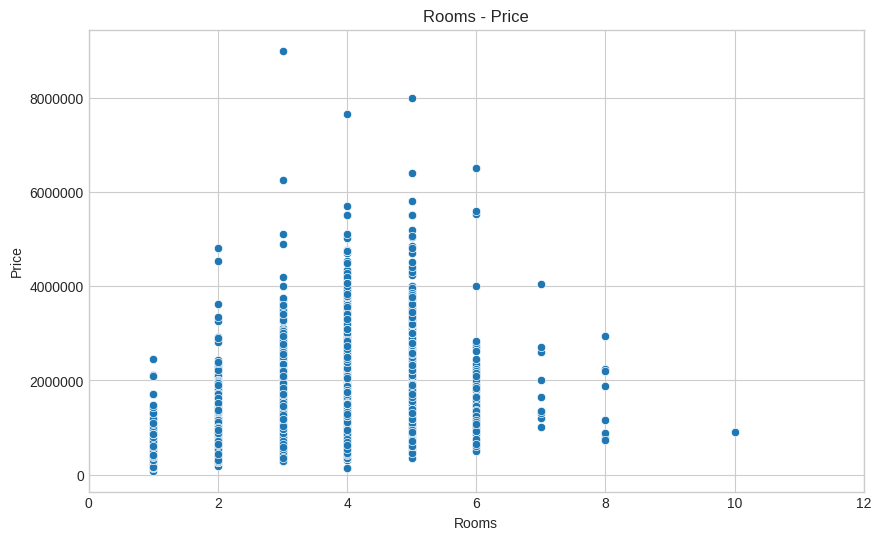

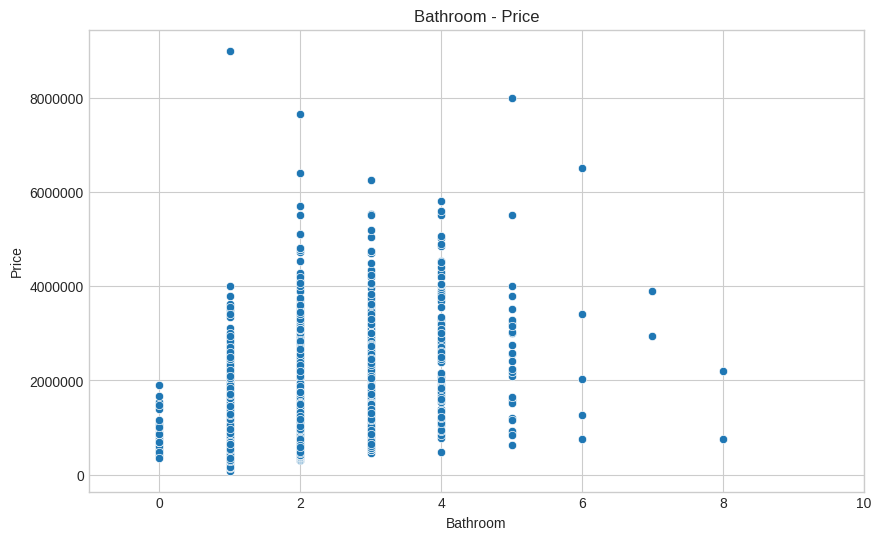

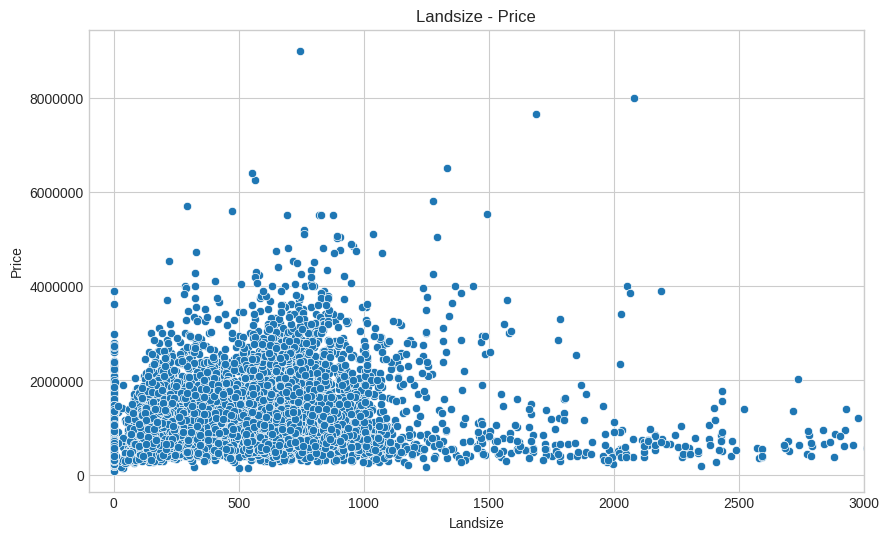

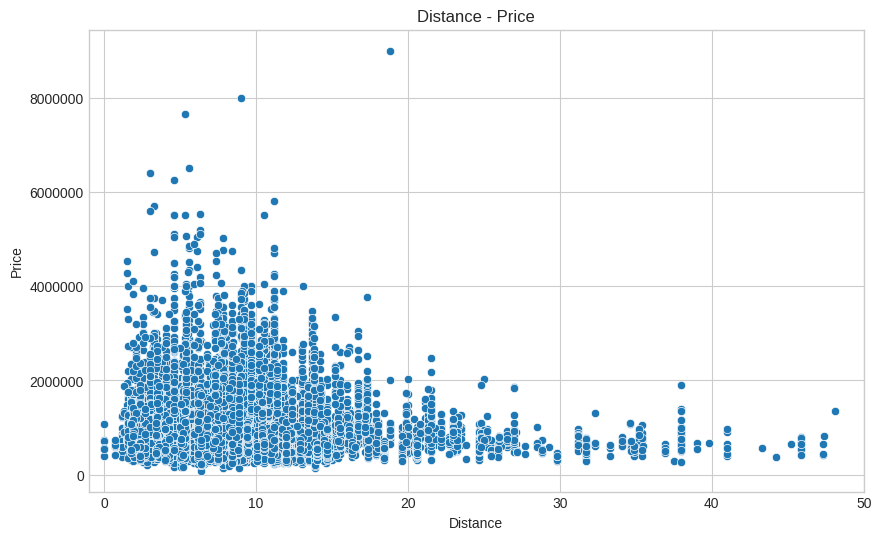

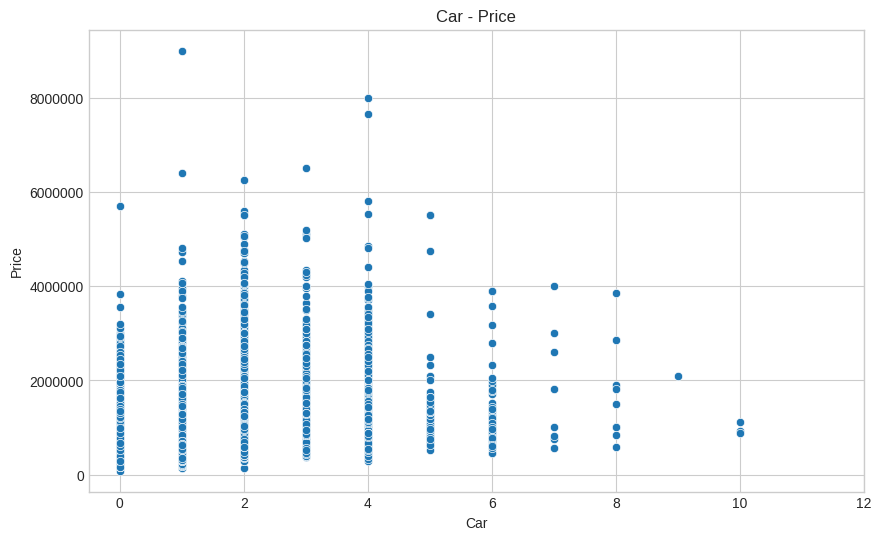

In [8]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Distance', 'Car']
x_limits = {
    'Rooms': (0, 12),
    'Bathroom': (-1, 10),
    'Landsize': (-100, 3000),    
    'Distance': (-1, 50),       
    'Car': (-0.5, 12,)
}

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f"{feature} - Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')

    if feature in x_limits:
        plt.xlim(x_limits[feature])

    plt.show()

####  Rooms - Price
- **Genel Eğilim:** Oda sayısı arttıkça fiyat genellikle artmaktadır.
- **Dağılım:** 3-4 odalı evler en yaygın olanlardır.
- **Aykırı Değer:** 3 odalı bir ev yaklaşık 9 milyon  değerinde, dikkat çekici bir aykırı değer .
- **Yorum:** `Rooms` değişkeni fiyat üzerinde pozitif ancak sınırlı bir etkiye sahiptir.

---

####  Bathroom - Price
- **Genel Eğilim:** Banyo sayısındaki artış, genel olarak fiyatta artışla ilişkilidir; ancak bu ilişki çok belirgin değildir.
- **Dağılım:** 1-2 banyolu evler çoğunluktadır. 6-8 banyolu evler nadir bulunuyor.
- **Aykırı Değer:** 8–10 banyolu bazı evlerin 2 milyon AUD altında fiyatlanması, bu seviye için beklenenin altındadır. Bu kayıtlar, veri setindeki genel eğilimle uyuşmadığı için **aykırı değer** olarak değerlendirilebilir.
- **Yorum:** `Bathroom` değişkeni lüks konutları ayırt etmede faydalı olabilir.

---

####  Landsize - Price
- **Genel Eğilim:** Arsa büyüklüğü arttıkça fiyat artabilir; ancak bu ilişki doğrusal ve güçlü değildir.
- **Dağılım:** 0–500 m² aralığında yoğunluk gözlenmektedir.
- **Aykırı Değer:** 2000 m² üzerinde olup 1 milyon  altında kalan evler dikkat çekicidir.
- **Yorum:** `Landsize`, lokasyon gibi diğer faktörlerden etkilendiği için doğrudan fiyata etkisi karışıktır.

---

####  Distance - Price
- **Genel Eğilim:** Şehir merkezine olan mesafe arttıkça fiyat düşme eğilimindedir.
- **Dağılım:** 0–20 km aralığında konumlanan evler fiyat açısından daha yoğundur.
- **Yorum:** `Distance` değişkeni fiyatla ters yönlü ilişki göstermektedir ve bu ilişki oldukça belirgindir.

---

####  Car - Price
- **Genel Eğilim:** Otopark kapasitesi arttıkça fiyat artabilir; ancak bu etki sınırlı ve dağınıktır.
- **Dağılım:** 1–2 araçlık otopark kapasitesi yaygındır.
- **Aykırı Değer:** 6+ araçlık park alanına sahip olup fiyatı düşük olan evler mevcut dikkat etmeliyiz
- **Yorum:** `Car` değişkeni lüks segmenti tanımlamada yardımcı olabilir; fakat tek başına belirleyici değildir.

## Tarih Bilgisinin Yıl ve Ay'a Ayrılması

In [9]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.drop(columns=['Date'], inplace=True)

##  Korelasyon Matrisi 

Bu bölümde sayısal değişkenlerin birbirleriyle ve özellikle `Price` ile olan ilişkisine göz atıyoruz. Korelasyon analizi, değişkenler arasında doğrusal bir ilişki olup olmadığını sayısal olarak gösterir.

- Değer +1’e yaklaştıkça güçlü bir **pozitif ilişki** vardır
- Değer -1’e yaklaştıkça güçlü bir **negatif ilişki** vardır 
- Değer 0’a yakınsa aralarında belirgin bir ilişki yok diyebiliriz

Bu analiz sayesinde, fiyatı etkileyen en önemli özellikleri daha net görebilir ve modelleme aşamasına daha sağlam adımlarla geçebiliriz.


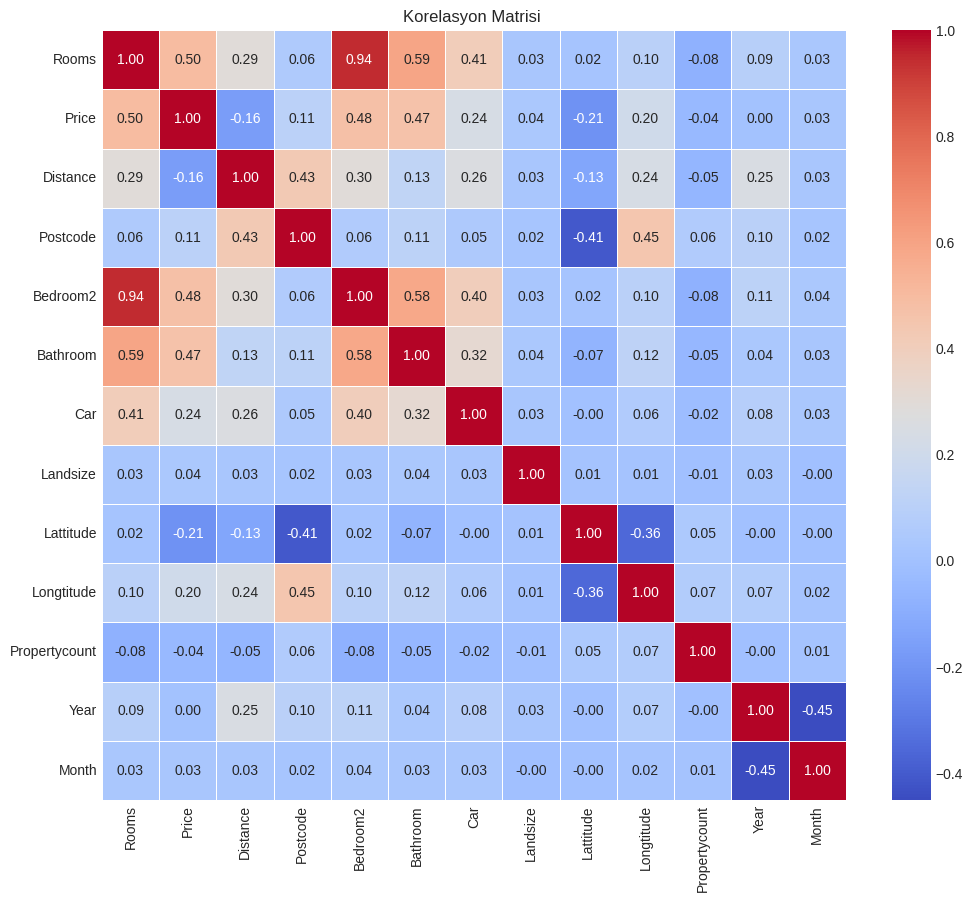

In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64','int32'])

# Korelasyon matrisi
plt.figure(figsize=(12,10))
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi ")
plt.show()

##  Korelasyon Matrisinden Öne Çıkanlar

###  Pozitif Korelasyonlar

 **Rooms, Bedroom2, Bathroom → Price**  
  Evdeki oda, yatak odası ve banyo sayısı arttıkça fiyat da genellikle artıyor.  
  Özellikle `Rooms` ile `Price` arasında **0.50** seviyesinde anlamlı bir korelasyon bulunmakta.

###  Zayıf ve Şaşırtıcı Korelasyonlar

 **Landsize,Year,Month → Price**  
 Arsa büyüklüğü , satış yılı ve satış ayı  değişkenlerinin, fiyat üzerinde çok düşük etkiye sahip olduğunu gözlemledik. Bu nedenle, modelin performansını artırmak ve gereksiz değişkenlerden arındırmak amacıyla bu özellikleri veri setinden çıkarıyoruz.

###  Negatif Korelasyonlar

 **Latitude - Price (`-0.21`)**  
  Konum olarak güney yönüne gidildikçe fiyatların düştüğü gözlemleniyor.  
  Lokasyonun fiyat üzerindeki etkisi dikkat çekici.

 **Distance - Price (`-0.16`)**  
  Şehir merkezine uzaklık arttıkça fiyatın azaldığı görülüyor.  
  Bu da oldukça beklenen bir durum.

###  Çok Yüksek Korelasyonlar

 **Bedroom2 - Rooms (`0.94`)**  
  Bu iki değişken neredeyse aynı bilgiyi taşıyor olabilir.  
  Aralarındaki çok yüksek korelasyon, modelde aynı bilginin iki kez kullanılması anlamına gelir. Bu nedenle modellemeden önce ikisinden biri elenmelidir.Aksi halde modelin öğrenme sürecinde bazı ağırlıkların yanlış yönlenmesine neden olabilir.


In [11]:
df = df.drop(columns=['Landsize', 'Year', 'Month','Bedroom2'])
df.columns.tolist()

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

## Kategorik Değişkenlerin Görselleştirilmesi

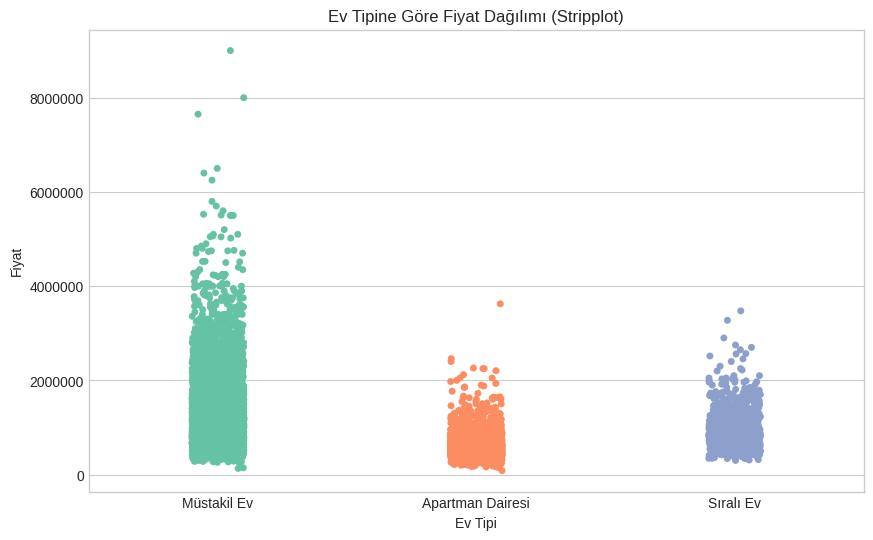

In [12]:
 df['Type_Label'] = df['Type'].map({
    'h': 'Müstakil Ev',
    'u': 'Apartman Dairesi',
    't': 'Sıralı Ev'
})

plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Type_Label', y='Price', palette='Set2')
plt.title("Ev Tipine Göre Fiyat Dağılımı (Stripplot)")
plt.xlabel("Ev Tipi")
plt.ylabel("Fiyat")
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

####  Müstakil Ev
- Fiyatlar oldukça geniş bir aralığa yayılmıştır.
- 8 milyon TL'ye kadar ulaşan uç değerler (outlier) bulunmaktadır.
- Genel olarak fiyat ortalaması yüksektir ve varyans oldukça fazladır.

####  Apartman Dairesi
- Fiyatlar daha dar bir aralıkta toplanmıştır.
- Çoğunluğu 2 milyon TL'nin altında yoğunlaşmıştır.
- Dağılım daha düzenlidir, uç değer sayısı azdır.

####  Sıralı Ev
- Fiyat dağılımı apartman dairelerine benzerdir.
- 3 milyon TL'nin üzerine çıkan çok az örnek vardır.

Bu analiz, ev tipi bilgisinin ev fiyatını anlamada önemli bir değişken olduğunu göstermektedir.

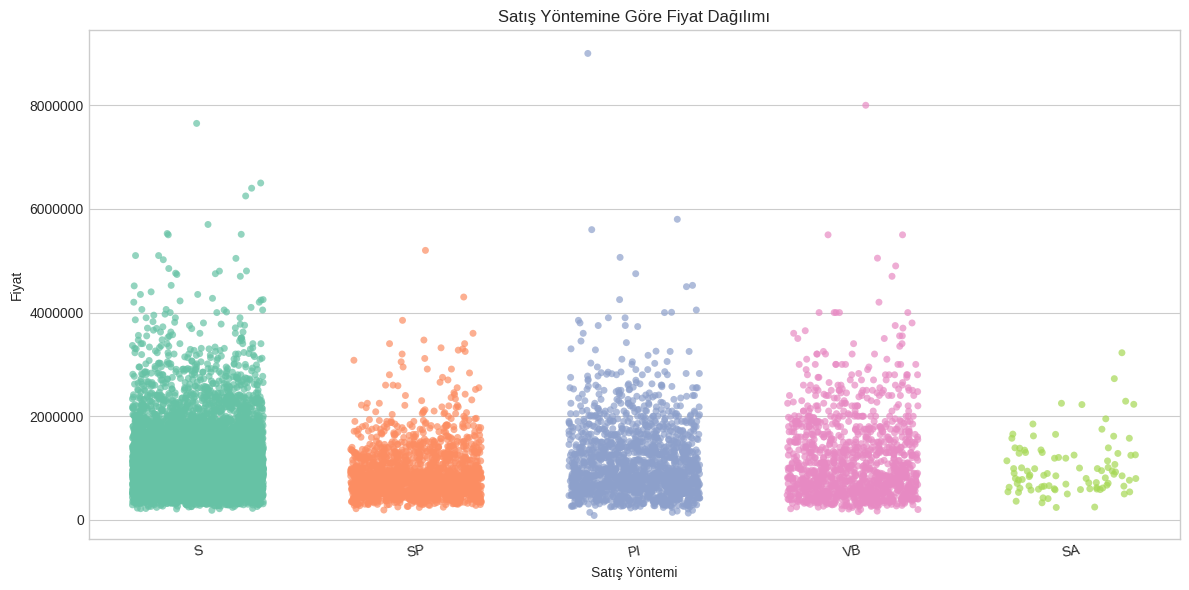

In [13]:
 method_map = {
    'S': 'Doğrudan Satış',
    'SP': 'Açık Artırma Öncesi',
    'PI': 'Satılamadı',
    'VB': 'Satıcının Teklifi',
    'SA': 'Açık Artırma Sonrası'
}

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Method', y='Price', palette='Set2', jitter=0.3, alpha=0.7)

plt.title("Satış Yöntemine Göre Fiyat Dağılımı")
plt.xlabel("Satış Yöntemi")
plt.ylabel("Fiyat")

# Y eksenini bilimsel olmayan formatta ve milyonluk ölçekle göster
plt.ticklabel_format(style='plain', axis='y')  # Bilimsel gösterimi kapatır
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

#### Doğrudan Satış(S)
- En yoğun kullanılan yöntemdir.
- Fiyatlar geniş bir dağılıma sahiptir ve 8 milyon'a kadar ulaşan değerler gözlemlenmiştir.
- Ortalama fiyat düzeyi yüksektir.

#### Açık Artırma Öncesi(SP)
- Fiyatlar genellikle 4 milyon'nun altında kalmakta, ancak birkaç uç değer mevcuttur.
- Satış süreci müzayede öncesi tamamlandığı için pazarlık etkisi olabilir.

#### Satılamayan(PI)
- Satış gerçekleşmemiştir; bu nedenle fiyatlar piyasanın üzerinde kalmış olabilir.
- Bazı yüksek fiyatlı satılamamış evler bulunmaktadır.

#### Satıcının Teklifi(VB)
- Geniş bir fiyat yelpazesi vardır.
- Satıcının kendi teklif verdiği durumlar olduğundan fiyatlar dalgalı olabilir.
- Bazı çok yüksek fiyatlı örnekler dikkat çekmektedir.

#### Açık Artırma Sonrası(SA)
- Fiyat aralığı en dar olan yöntemdir.
- Satış sonrası müzakere ile gerçekleştiği için daha sınırlı ve düşük fiyatlar gözlemlenmektedir.

Veri setinden "Satılamayan (PI)" ve "Satıcının Teklifi (VB)" yöntemleriyle işaretlenmiş satırların çıkarılma sebebi, bu işlemlerin satışın gerçekleşmediği durumları temsil etmesidir.Sonuç olarak, bu tür kayıtlar, modelin gerçek satış fiyatlarını öğrenmesi açısından yanıltıcı olabilir. Bu nedenle analizden çıkarılmaları, daha doğru ve güvenilir tahminler yapılmasını sağlar

In [14]:
df = df[~df['Method'].isin(['PI','VB'])]

## 4. Aykırı Değer Analizi

### Log Dönüşümü 
Veri setimizdeki `Price` (Fiyat) değişkeni oldukça geniş bir aralıkta dağılmıştır. Özellikle bazı müstakil evlerde 8 milyonu aşan fiyatlar bulunmaktadır. Bu durum, veri dağılımında **çarpıklık** oluşturmakta ve **uç değerlerin** model üzerinde baskın hale gelmesine neden olmaktadır.Bu problemi azaltmak için `Price` değişkenine **logaritmik dönüşüm** uygulamalıyız.


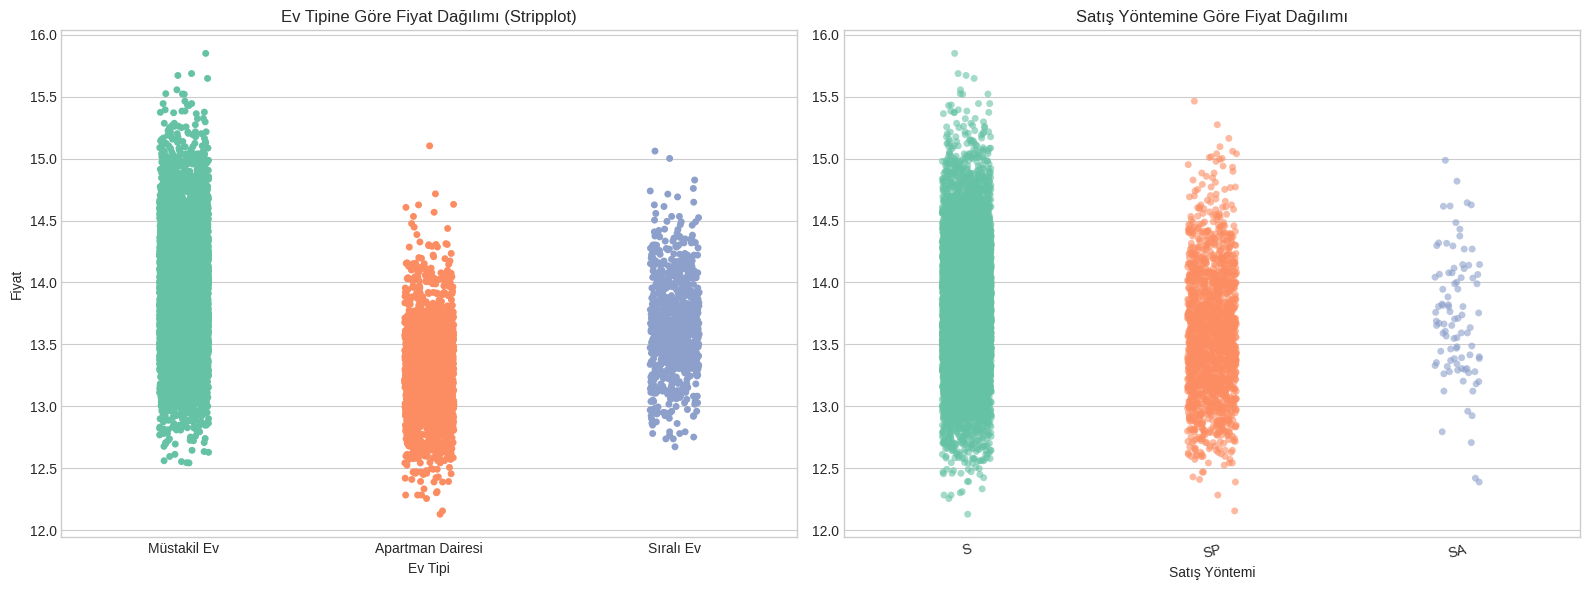

In [15]:
plt.figure(figsize=(16, 6))
df['LogPrice'] = np.log1p(df['Price'])
# 1. Ev Tipine Göre Fiyat Dağılımı
df['Type_Label'] = df['Type'].map({
    'h': 'Müstakil Ev',
    'u': 'Apartman Dairesi',
    't': 'Sıralı Ev'
})
plt.subplot(1, 2, 1)
sns.stripplot(data=df, x='Type_Label', y='LogPrice', palette='Set2')
plt.title("Ev Tipine Göre Fiyat Dağılımı (Stripplot)")
plt.xlabel("Ev Tipi")
plt.ylabel("Fiyat")
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

# 2. Satış Yöntemine Göre Fiyat Dağılımı
plt.subplot(1, 2, 2)
sns.stripplot(data=df, x='Method', y='LogPrice', palette='Set2', alpha=0.6)
plt.title('Satış Yöntemine Göre Fiyat Dağılımı')
plt.xlabel('Satış Yöntemi')
plt.ylabel('')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

Aykırı değerler ile ilgili işlemimizi başarıyla tamamladık. Şimdi model performansını artırmak için özellik mühendisliği adımına geçiyoruz.

## 5. Özellik Mühendisliği

Bu aşamada, modelin doğruluk ve genelleme kapasitesini artırmak amacıyla veri setindeki özellikleri detaylı şekilde analiz ederek geliştireceğiz.

Başlıca hedeflerimiz:  

- Veri yapısına uygun olarak **kategorik ve sayısal değişkenlerin etkin kodlanması ve dönüştürülmesi**,  
- Model performansını maksimize edecek **yeni özelliklerin türetilmesi ve mevcut özelliklerin optimize edilmesi**,  
- **Gereksiz veya düşük bilgi içeren değişkenlerin belirlenerek elenmesi (feature selection)**,  
- Modelin daha hızlı ve verimli öğrenmesini sağlayacak **ölçeklendirme ve normalizasyon işlemleri**.

Bu kapsamlı süreç, modelin karmaşık veri yapısını daha iyi kavramasına ve daha sağlam tahminler yapmasına olanak tanıyacaktır.


###  İlk Adım: Düşük Bilgi İçeren ve Gereksiz Özelliklerin Elenmesi

Model performansını artırmak ve hesaplama verimliliğini sağlamak için, veri setimizde bilgi katkısı sınırlı veya gereksiz özellikleri belirleyip eleyeceğiz.

Bu süreçte;

- Fazla derecede kategorik benzersiz değer bulunan (yüksek kardinaliteli) değişkenler,  
- Tekrarlayan ya da çok benzer bilgiler içeren sütunlar,  
- Analiz ve modelleme açısından anlamlı olmayan değişkenler,

özellikle hedef alınacaktır.

Bu adım, modelin gereksiz gürültüden arınarak daha sağlam ve genellenebilir sonuçlar üretmesini sağlayacaktır.

- **Address:** Her kayıt için benzersiz ve çok detaylı bir adres bilgisi içerdiği için modelde genelleme yapmayı zorlaştırır.  
- **SellerG:** Çok yüksek kardinaliteli (benzersiz satıcı isimleri) kategorik sütundur, direkt modele dahil edilmesi zordur.  
- **Postcode:** Sayısal gibi görünse de kategorik bir değişkendir ve yüksek kardinalitelidir.Model karmaşasına sebep olur.  
- **Regionname:** Bölgesel bilgi verir ancak bazen fazla kategorik olup modelin karmaşasını artırabilir.  
- **Propertycount:** Veri kalitesi ve anlam açısından düşük etkili olabilir, bu yüzden çıkarılır.  
- **Suburb:** Mahalle adı olarak çok yüksek kardinaliteye sahiptir, modelde genelleme güçlüğü yaratır.

In [16]:
drop_columns = ['Address', 'SellerG', 'Postcode', 'Regionname', 'Propertycount', 'Suburb']

df = df.drop(columns=drop_columns)

df.columns.tolist()


['Rooms',
 'Type',
 'Price',
 'Method',
 'Distance',
 'Bathroom',
 'Car',
 'Lattitude',
 'Longtitude',
 'Type_Label',
 'LogPrice']

Veri temizliği ve aykırı değer analizlerinden sonra elimizde kalan sütunlar model için önemli bilgiler içeriyor.
1. **Kategorik Değişkenlerin Kodlanması**  
   `Type` ve `Method` sütunları için uygun encoding yöntemleri uygulanacak.

2. **Sayısal Değişkenlerin İşlenmesi**  
   `Rooms`, `Distance`, `Bathroom`, `Car`,  sütunlarına normalizasyon işlemi uygulanacak.


1. **Kategorik Değişkenlerin Kodlanması**

In [17]:
df = pd.get_dummies(df, columns=['Type', 'Method'], drop_first=True)
df

,Rooms,Price,Distance,Bathroom,Car,Lattitude,Longtitude,Type_Label,LogPrice,Type_t,Type_u,Method_SA,Method_SP
0,2,1480000.0,2.5,1.0,1.0,-37.79960,144.99840,Müstakil Ev,14.207553,False,False,False,False
1,2,1035000.0,2.5,1.0,0.0,-37.80790,144.99340,Müstakil Ev,13.849913,False,False,False,False
2,3,1465000.0,2.5,2.0,0.0,-37.80930,144.99440,Müstakil Ev,14.197366,False,False,False,True
5,2,941000.0,2.5,1.0,0.0,-37.80410,144.99530,Müstakil Ev,13.754699,False,False,False,False
6,3,1876000.0,2.5,2.0,0.0,-37.80240,144.99930,Müstakil Ev,14.444653,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,3,582000.0,16.5,2.0,2.0,-37.67917,144.89390,Müstakil Ev,13.274227,False,False,False,False
13575,4,1245000.0,16.7,2.0,2.0,-37.90562,145.16761,Müstakil Ev,14.034647,False,False,False,False
13576,3,1031000.0,6.8,2.0,2.0,-37.85927,144.87904,Müstakil Ev,13.846041,False,False,False,True
13577,3,1170000.0,6.8,2.0,4.0,-37.85274,144.88738,Müstakil Ev,13.972515,False,False,False,False


## Model Eğitimi İçin Veri Setinin Hazırlanması: Eğitim ve Test Olarak Ayrılması
Bu bölümde, modelleme sürecine geçmeden önce veri setimizi eğitim (%80) ve test (%20) olmak üzere ikiye ayırıyoruz. Böylece modelin başarısını daha doğru şekilde değerlendirebileceğiz.`random_state=42` kullanılarak veri bölme işleminin her seferinde aynı sonuçları vermesi sağlanmıştır. Bu, model karşılaştırmaları ve yeniden eğitim için tutarlılık sağlar.

In [18]:
df.drop("Type_Label", axis=1,inplace=True)
X = df.drop(columns=["Price", "LogPrice"],axis=1)  
y = df["LogPrice"]    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. **Sayısal Değişkenlerin İşlenmesi**

Farklı ölçeklerdeki sayısal değişkenler, modelin bu değişkenlere farklı öncelik vermesine neden olabilir. Bu durumu engellemek ve tüm özelliklerin modele eşit katkı sağlamasını sağlamak için **normalizasyon (ölçeklendirme)** işlemi uygulanır.

In [19]:
scale_cols = ['Rooms', 'Distance', 'Bathroom', 'Car']


X_train = X_train.copy()
X_test = X_test.copy()


scaler = StandardScaler()


X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
df

,Rooms,Price,Distance,Bathroom,Car,Lattitude,Longtitude,LogPrice,Type_t,Type_u,Method_SA,Method_SP
0,2,1480000.0,2.5,1.0,1.0,-37.79960,144.99840,14.207553,False,False,False,False
1,2,1035000.0,2.5,1.0,0.0,-37.80790,144.99340,13.849913,False,False,False,False
2,3,1465000.0,2.5,2.0,0.0,-37.80930,144.99440,14.197366,False,False,False,True
5,2,941000.0,2.5,1.0,0.0,-37.80410,144.99530,13.754699,False,False,False,False
6,3,1876000.0,2.5,2.0,0.0,-37.80240,144.99930,14.444653,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13574,3,582000.0,16.5,2.0,2.0,-37.67917,144.89390,13.274227,False,False,False,False
13575,4,1245000.0,16.7,2.0,2.0,-37.90562,145.16761,14.034647,False,False,False,False
13576,3,1031000.0,6.8,2.0,2.0,-37.85927,144.87904,13.846041,False,False,False,True
13577,3,1170000.0,6.8,2.0,4.0,-37.85274,144.88738,13.972515,False,False,False,False


## Boolean Sütunları Sayısala Çevirme
Boolean encoding çıktılarını sayısal formata çevirmezsek, ML modelleri bu sütunları işleyemez çünkü bu algoritmalar yalnızca sayısal matrisler üzerinde çalışır.

In [20]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10817 entries, 0 to 13579
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       10817 non-null  int64  
 1   Price       10817 non-null  float64
 2   Distance    10817 non-null  float64
 3   Bathroom    10817 non-null  float64
 4   Car         10817 non-null  float64
 5   Lattitude   10817 non-null  float64
 6   Longtitude  10817 non-null  float64
 7   LogPrice    10817 non-null  float64
 8   Type_t      10817 non-null  int64  
 9   Type_u      10817 non-null  int64  
 10  Method_SA   10817 non-null  int64  
 11  Method_SP   10817 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 1.1 MB


## 6. Modelleme
Verileri hazırlayıp temizledikten sonra sıra, onları tahmin yapabilecek bir modele dönüştürmeye geldi. Bu aşamada farklı algoritmalar denedik, her birinin nasıl sonuçlar verdiğini test ettik. Amacımız, ev fiyatlarını en doğru şekilde tahmin eden ve test verilerinde de tutarlı sonuçlar veren modeli bulmaktı. Sonuçları karşılaştırarak en iyi performansı gösteren yöntemi seçtik.

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}
results = []


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

  
    y_test_real = np.expm1(y_test)
    y_pred_real = np.expm1(y_pred)

    rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)
    mae = mean_absolute_error(y_test_real, y_pred_real)
    r2 = r2_score(y_test_real, y_pred_real)

    results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R²": round(r2, 4)
    })


results_df = pd.DataFrame(results)
print(results_df)

               Model       RMSE        MAE      R²
0  Linear Regression  387478.65  242897.67  0.5603
1      Random Forest  316173.38  185819.02  0.7072


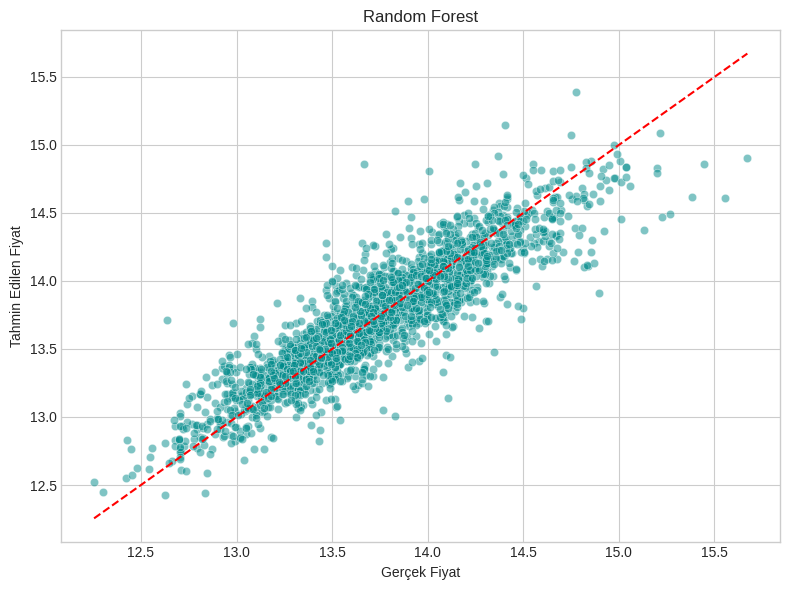

In [22]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='darkcyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # ideal çizgi
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()

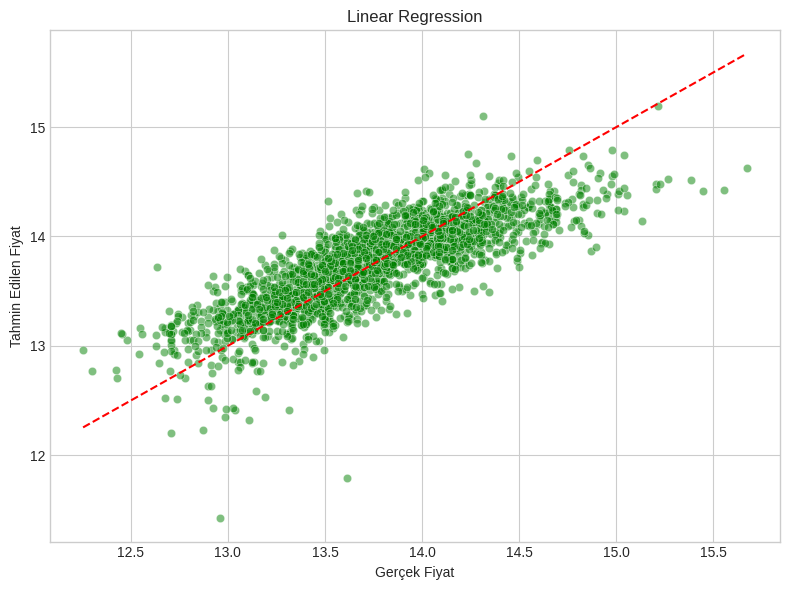

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Tahmin yap
y_pred_lr = lr_model.predict(X_test)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # ideal çizgi
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Linear Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Seçimi: Random Forest
Farklı algoritmalarla denemeler yaptıktan sonra, ev fiyatlarını en isabetli şekilde tahmin eden modelin Random Forest Regressor olduğunu gördük. Hem karmaşık ilişkileri öğrenme gücü, hem de aşırı öğrenmeye karşı dayanıklı yapısı sayesinde diğer modellere göre daha düşük hata verdi. Bu yüzden, modelleme sürecine Random Forest ile devam etmeye karar verdik.

## 7. Hiperparametre Optimizasyonu

Random Forest modelinin performansını artırmak için bazı önemli parametrelerin en uygun değerlerini belirlememiz gerekiyor:

- **`n_estimators`** → Kaç adet karar ağacı oluşturulacağını belirler. Daha fazla ağaç genelde daha iyi sonuç verir ama işlem süresini artırır.

- **`max_depth`** → Her bir ağacın maksimum derinliği. Derinlik arttıkça model karmaşık ilişkileri öğrenebilir ancak aşırı öğrenme riski doğar.

- **`min_samples_split`** → Bir dalın bölünebilmesi için gereken minimum örnek sayısı.

- **`min_samples_leaf`** → Her yaprakta bulunması gereken minimum örnek sayısı. Modelin genelleme yeteneğini etkiler.


In [24]:
model = RandomForestRegressor(random_state=42, n_jobs=-1)


param_dist = {
    'n_estimators': randint(100, 300),         
    'max_depth': [5, 10, 15, 20, None],        
    'min_samples_split': randint(2, 10),       
    'min_samples_leaf': randint(1, 5)         
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,                     
    scoring='neg_root_mean_squared_error',
    cv=5,                          
    random_state=42,
    n_jobs=-1,                     
    verbose=1
)


random_search.fit(X_train, y_train)


print("En iyi parametreler:", random_search.best_params_)
print("CV RMSE:", -random_search.best_score_)


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
En iyi parametreler: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 229}
CV RMSE: 0.21277188670857733
Test RMSE: 0.2196286041313488


- **`n_estimators`** → 229
- **`max_depth`** → 20
- **`min_samples_split`** → 7
- **`min_samples_leaf`** → 2

MAE: 185,325
RMSE: 312,565
R²: 0.7139


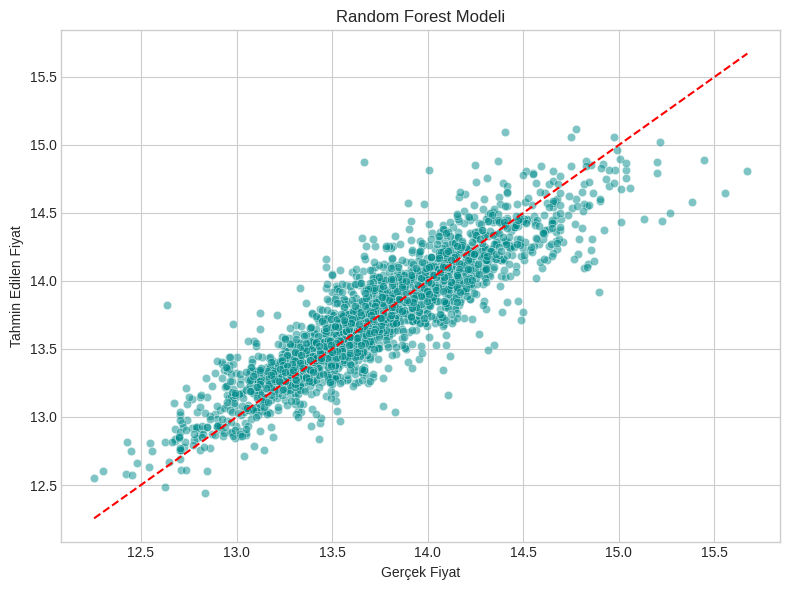

In [25]:
model = RandomForestRegressor(
    n_estimators=229,
    max_depth=20,
    min_samples_split=7,
    min_samples_leaf=2,
    random_state=42,
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)

   

rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)
mae = mean_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²: {r2:.4f}")


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='darkcyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # ideal çizgi
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Random Forest Modeli')
plt.grid(True)
plt.tight_layout()
plt.show()

## 8. Sonuç
Ev fiyatlarını tahmin etmek amacıyla gerçekleştirdiğimiz bu çalışma kapsamında, veriyi analiz edip temizledik, çeşitli modeller denedik ve en iyi performansı gösteren Random Forest Regressor modelinde karar kıldık. Modelin başarısını daha da artırmak için hiperparametre optimizasyonu uyguladık ve bu sayede hata oranlarını önemli ölçüde düşürdük. Sonuç olarak, geliştirilen model ev fiyatlarını gerçek değerlere oldukça yakın bir şekilde tahmin edebilme yeteneği gösterdi. Bu analiz, makine öğrenmesi tekniklerinin gayrimenkul değer tahmini gibi pratik problemler üzerinde nasıl etkili çözümler sunabileceğini göstermiş oldu.